In [1]:
###############################################################
# This code is intended to 'heal' problematic a's and b's
# poduced in first round of vertical grid generation for 
# CAM7
##############################################################

# Import packages 
import sys
import argparse as arg

import time
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# import modules in other directories
sys.path.append('../Regridder/')
import scripGen as SG
sys.path.append('../Utils/')
import VertGridUtils as VGU

import importlib
importlib.reload( SG )
importlib.reload( VGU )

#Rdry = Con.Rdry() # 



 MyConstants in /glade/work/juliob/PyRegridding/Utils 


<module 'VertGridUtils' from '/glade/work/juliob/PyRegridding/Drivers/../Utils/VertGridUtils.py'>

 given by

p(\eta) = A(\eta) p_0 + B(\eta) p_s.

In [2]:
#####################################
myGridFiles = '/glade/work/juliob/GridFiles/'


In [3]:

Prblm_Vfile = '/glade/campaign/cgd/amp/pel/inic/L135_ne30pg3_ne30pg3_mg17.cam.i.1979-01-11-00000.nc'
######################################################################
# Need L58 for consistent 'adjustment/grid alignment' if desired
######################################################################
L58file = f'{myGridFiles}/Vertical/GRID_48_taperstart10km_lowtop_BL10_v3p1_beta1p75.nc'


In [4]:
Lprblm =xr.open_dataset( Prblm_Vfile )
L58 = xr.open_dataset( L58file )

pXX  = Lprblm.hyai.values + Lprblm.hybi.values
p58  = L58.hyai.values + L58.hybi.values

hyai_prblm = Lprblm.hyai.values
hybi_prblm = Lprblm.hybi.values


In [5]:
hyaiXX , hybiXX = VGU.Original_as_bs(pXX , gridalign=True, p58=p58 )

In [6]:
pXX.shape

(136,)

Text(0.5, 1.0, '$\\mathrm{hybrid}~~A(\\eta)~~\\mathrm{and}~~B(\\eta)$')

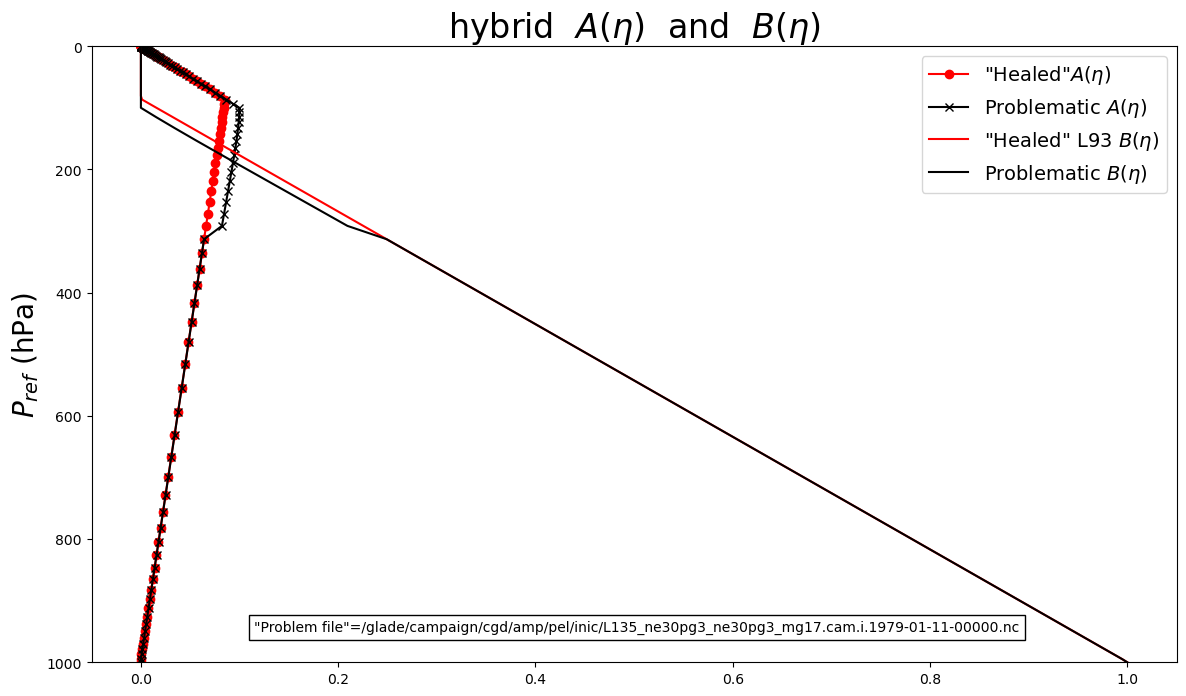

In [9]:
#plt.plot(p58,bb)
#plt.plot(p58,L58.hybi)
#plt.plot(p58,aa)

fig,ax=plt.subplots( 1,1 , squeeze=False, figsize=(14,8) )

ax[0,0].plot(hyaiXX  , 1_000.*pXX, '-o' ,color='red'  , label='"Healed"$A(\eta)$' )
ax[0,0].plot(hyai_prblm , 1_000.*pXX ,'-x', color='black' , label='Problematic $A(\eta)$'   )
ax[0,0].plot(hybiXX  , 1_000.*pXX ,color='red' , label='"Healed" L93 $B(\eta)$'  )
ax[0,0].plot(hybi_prblm , 1_000.*pXX, color='black' , label='Problematic $B(\eta)$'   )

annot3= ax[0,0].text( 0.15,.05,f'"Problem file"={Prblm_Vfile}' , transform=ax[0,0].transAxes, fontsize=10, bbox=dict(facecolor='white') )

plt.ylim( (1000.,0.) )
plt.legend(fontsize=14)
plt.ylabel( "$P_{ref}$ (hPa)" ,fontsize=20)
plt.title( "$\mathrm{hybrid}~~A(\eta)~~\mathrm{and}~~B(\eta)$", fontsize=24 )

In [11]:
nzXXe  =len(pXX)
nzXX   =nzXXe-1


hyamXX = np.zeros( nzXX )
hybmXX = np.zeros( nzXX )

for L in np.arange( 0, nzXX, 1):
    hyamXX[L] = 0.5 * ( hyaiXX[L] + hyaiXX[L+1] )
    hybmXX[L] = 0.5 * ( hybiXX[L] + hybiXX[L+1] ) 


In [13]:
import datetime
# Using the current date
current_date = datetime.datetime.now()
create_date = current_date.strftime('c%Y%m%d')

desc='OrigAB'


ilev = (hyaiXX + hybiXX ) * 1_000. #* 100_000.
lev  = (hyamXX + hybmXX ) * 1_000. #* 100_000.


dims   = ["lev","ilev"]
coords = dict( 
    lev  = ( ["lev"],lev),
    ilev = ( ["ilev"],ilev),
)


NewVgrid = xr.Dataset( coords=coords  )

Dar = xr.DataArray( data=hyaiXX, dims=('ilev',),
                    attrs=dict( description='interface hybrid eta coordinate A-coeff ',units='1',) ,) 
NewVgrid['hyai'] = Dar

Dar = xr.DataArray( data=hybiXX, dims=('ilev',),
                    attrs=dict( description='interface hybrid eta coordinate B-coeff ',units='1',) ,) 
NewVgrid['hybi'] = Dar

Dar = xr.DataArray( data=hyamXX, dims=('lev',),
                    attrs=dict( description='mid-level hybrid eta coordinate A-coeff ',units='1',) ,) 
NewVgrid['hyam'] = Dar

Dar = xr.DataArray( data=hybmXX, dims=('lev',),
                    attrs=dict( description='mid-level hybrid eta coordinate B-coeff ',units='1',) ,) 
NewVgrid['hybm'] = Dar

newname = f'{myGridFiles}/Vertical/GRID_{str(nzXX)}L_CAM7_{desc}_{create_date}.nc'

print(newname) 

NewVgrid.to_netcdf( newname )


/glade/work/juliob/GridFiles//Vertical/GRID_135L_CAM7_OrigAB_c20241011.nc


In [14]:
##################
#
# Truncate the grid if desired
#
##################
hyaiXX = hyaiXX[15:]
hybiXX = hybiXX[15:]
pXX = pXX[15:]

nzXXe  =len(pXX)
nzXX   =nzXXe-1


hyamXX = np.zeros( nzXX )
hybmXX = np.zeros( nzXX )

for L in np.arange( 0, nzXX, 1):
    hyamXX[L] = 0.5 * ( hyaiXX[L] + hyaiXX[L+1] )
    hybmXX[L] = 0.5 * ( hybiXX[L] + hybiXX[L+1] ) 


In [15]:
import datetime
# Using the current date
current_date = datetime.datetime.now()
create_date = current_date.strftime('c%Y%m%d')

desc='OrigAB_Truncated_L135'


ilev = (hyaiXX + hybiXX ) * 1_000. #* 100_000.
lev  = (hyamXX + hybmXX ) * 1_000. #* 100_000.


dims   = ["lev","ilev"]
coords = dict( 
    lev  = ( ["lev"],lev),
    ilev = ( ["ilev"],ilev),
)


NewVgrid = xr.Dataset( coords=coords  )

Dar = xr.DataArray( data=hyaiXX, dims=('ilev',),
                    attrs=dict( description='interface hybrid eta coordinate A-coeff ',units='1',) ,) 
NewVgrid['hyai'] = Dar

Dar = xr.DataArray( data=hybiXX, dims=('ilev',),
                    attrs=dict( description='interface hybrid eta coordinate B-coeff ',units='1',) ,) 
NewVgrid['hybi'] = Dar

Dar = xr.DataArray( data=hyamXX, dims=('lev',),
                    attrs=dict( description='mid-level hybrid eta coordinate A-coeff ',units='1',) ,) 
NewVgrid['hyam'] = Dar

Dar = xr.DataArray( data=hybmXX, dims=('lev',),
                    attrs=dict( description='mid-level hybrid eta coordinate B-coeff ',units='1',) ,) 
NewVgrid['hybm'] = Dar

newname = f'{myGridFiles}/Vertical/GRID_{str(nzXX)}L_CAM7_{desc}_{create_date}.nc'

print(newname) 

NewVgrid.to_netcdf( newname )


/glade/work/juliob/GridFiles//Vertical/GRID_120L_CAM7_OrigAB_Truncated_L135_c20241011.nc


In [18]:
print( np.shape(p58))

(59,)
